In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyarrow as pa
import pyarrow.parquet as pq
import geopandas as gpd
import seaborn as sns

#Packages
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
from scipy import stats
pd.set_option('display.max_columns', None)
import tensorflow as tf

In [2]:
df = pd.read_parquet('Datasets/july_16_flood_data.parquet.gzip')

In [7]:
df.shape[0]

2495293

In [8]:
df['causeOfDamage'].value_counts(dropna=False)

4       1115156
1        612846
2        493398
0        199404
None      36852
B         15769
3         12552
D          5489
9          1754
A           642
7           595
C           430
8           381
5            17
6             3
@             2
N             2
Z             1
Name: causeOfDamage, dtype: int64

In [9]:
df[df['causeOfDamage'].isna()].shape[0]

36852

In [14]:
df_test = df[df['waterDepth'].notna()]

In [16]:
df_test[df_test['waterDepth']<=10].shape[0]/df_test.shape[0]

0.9521841486203471

In [39]:
flood_events_with_multiple_years = []

for event in df_test['floodEvent'].unique():
    unique_years = df_test[df_test['floodEvent'] == event]['yearOfLoss'].unique()
    if len(unique_years) > 1:
        flood_events_with_multiple_years.append(event)

print(flood_events_with_multiple_years)

['Flooding', 'Hurricane Isabel', 'Tropical Storm Alberto', 'Torrential rain', 'Hurricane Irene', 'Hurricane Bonnie', "Nor'easter", 'Mid-spring storms', 'Tropical Storm Allison', 'Hurricane Dennis', 'Heavy rains', 'Late spring storms', 'Hurricane Florence', 'Late summer storms', 'Hurricane Bob', 'Early winter storms', 'Storm', 'Winter storm', 'Tropical Storm Barry', 'Hurricane Hanna', 'Not a named storm', 'Tropical Storm Claudette', 'California Atmospheric River']


In [42]:
df_test[df_test['floodEvent']=='Hurricane Bonnie']['yearOfLoss'].unique()

array([1998, 1986], dtype=int64)

In [71]:
df['reportedZipCode'].nunique()

25826

In [55]:
df = df.drop(df.columns[0], axis=1)

In [61]:
df.head()

,agricultureStructureIndicator,asOfDate,policyCount,dateOfLoss,elevatedBuildingIndicator,ratedFloodZone,houseWorship,locationOfContents,numberOfFloorsInTheInsuredBuilding,nonProfitIndicator,occupancyType,originalConstructionDate,originalNBDate,amountPaidOnBuildingClaim,amountPaidOnContentsClaim,amountPaidOnIncreasedCostOfComplianceClaim,postFIRMConstructionIndicator,rateMethod,smallBusinessIndicatorBuilding,totalBuildingInsuranceCoverage,totalContentsInsuranceCoverage,yearOfLoss,primaryResidenceIndicator,buildingDamageAmount,buildingDeductibleCode,netBuildingPaymentAmount,buildingPropertyValue,causeOfDamage,condominiumCoverageTypeCode,contentsDeductibleCode,netContentsPaymentAmount,disasterAssistanceCoverageRequired,ficoNumber,floodWaterDuration,floodproofedIndicator,floodEvent,iccCoverage,netIccPaymentAmount,nfipRatedCommunityNumber,nfipCommunityName,numberOfUnits,buildingReplacementCost,replacementCostBasis,stateOwnedIndicator,waterDepth,rentalPropertyIndicator,state,reportedCity,reportedZipCode,countyCode,censusTract,censusBlockGroupFips,latitude,longitude,id,proportionLeqOne,proportionLeqTwo,proportionLeqThree,proportionLeqFour,proportionLeqFive,proportionLeqSix,medWaterDepth,p25WaterDepth,p75WaterDepth,p90WaterDepth,diffMedWaterDepth,diff90WaterDepth,originalConstructionDate_year,AgeofBuildinguntilflood
0,0,2020-01-22T16:55:53.194Z,1,1998-02-07 00:00:00+00:00,0,X,0,NaN,4.0,0,1.0,1963-01-01 00:00:00+00:00,1997-01-11T00:00:00.000Z,NaN,NaN,NaN,0,7,0,200000.0,50000.0,1998,0,382.0,0,0.00,937.0,1,N,0,0.0,0.0,612.0,0.0,0,Pineapple Express - Southern,15000.0,0.0,60294.0,"OCEANSIDE, CITY OF",1.0,937.0,A,0,0.0,0,CA,Currently Unavailable,92056.0,6073.0,6.073019e+09,6.073019e+10,33.2,-117.3,23dcb0d8-3e61-45bf-899f-b951946ce2ff,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,1963.0,35.0
1,0,2020-01-22T16:55:53.194Z,1,2005-08-29 00:00:00+00:00,0,X,0,NaN,2.0,0,1.0,1967-07-01 00:00:00+00:00,1990-07-12T00:00:00.000Z,NaN,NaN,NaN,0,7,0,100000.0,40000.0,2005,1,NaN,0,0.00,NaN,1,N,0,0.0,0.0,654.0,0.0,0,Hurricane Katrina,30000.0,0.0,225203.0,NEW ORLEANS/ORLEANS PARISH*,1.0,NaN,A,0,0.0,0,LA,Currently Unavailable,70131.0,22071.0,2.207100e+10,2.207100e+11,29.9,-90.0,55783cdd-ccbd-4b19-930b-072def248507,0.928571,0.939560,0.939560,0.939560,0.950549,0.950549,0.0,0.0,1.0,1.0,0.0,-1.0,1967.0,38.0
2,0,2020-01-22T16:55:53.194Z,1,1998-09-28 00:00:00+00:00,0,X,0,NaN,1.0,0,1.0,1972-01-01 00:00:00+00:00,1997-07-24T00:00:00.000Z,8813.21,1720.0,0.0,0,1,0,100000.0,50000.0,1998,1,9313.0,0,8813.21,80000.0,1,N,0,1720.0,0.0,133.0,0.0,0,Hurricane Georges (Panhandle),15000.0,0.0,120274.0,SANTA ROSA COUNTY *,1.0,100000.0,A,0,0.0,0,FL,Currently Unavailable,32566.0,12113.0,1.211301e+10,1.211301e+11,30.4,-86.9,bfb5922b-1b21-4882-b1d4-b3825ff53e37,0.888889,0.888889,0.888889,0.888889,1.000000,1.000000,0.0,0.0,0.0,1.0,0.0,-1.0,1972.0,26.0
3,0,2019-09-19T13:45:58.425Z,1,1994-10-07 00:00:00+00:00,0,X,0,NaN,2.0,0,1.0,1960-01-01 00:00:00+00:00,1993-10-01T00:00:00.000Z,2906.00,0.0,0.0,0,7,0,100000.0,25000.0,1994,0,4428.0,0,2906.00,100000.0,1,N,0,0.0,0.0,NaN,0.0,0,None,NaN,0.0,450026.0,"BEAUFORT, CITY OF",1.0,0.0,A,0,0.0,0,SC,Currently Unavailable,29902.0,45013.0,4.501300e+10,4.501300e+11,32.4,-80.7,c1cf6e00-1e6d-4493-93fc-eb430ef15495,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,1960.0,34.0
4,0,2019-09-19T13:45:58.425Z,1,1996-03-11 00:00:00+00:00,0,X,0,NaN,1.0,0,1.0,1988-01-01 00:00:00+00:00,1996-01-11T00:00:00.000Z,3875.53,1545.0,0.0,1,7,0,100000.0,25000.0,1996,1,5252.0,0,3875.53,100000.0,1,N,0,1545.0,0.0,NaN,0.0,0,None,NaN,0.0,125092.0,BREVARD COUNTY *,1.0,0.0,A,0,0.0,0,FL,Currently Unavailable,32940.0,12009.0,1.200906e+10,1.200906e+11,28.3,-80.7,cad8334c-13f2-4837-bdcf-e09591197ff7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,1988.0,8.0


In [60]:
df['dateOfLoss'] = pd.to_datetime(df['dateOfLoss'])
df['originalConstructionDate'] = pd.to_datetime(df['originalConstructionDate'], errors='coerce')
df['originalConstructionDate_year'] = df['originalConstructionDate'].dt.year

df['AgeofBuildinguntilflood'] = df['yearOfLoss'] - df['originalConstructionDate_year']

In [ ]:
corr_columns1 = ['houseWorship', 'elevatedBuildingIndicator', 'ratedFloodZone',
                'locationOfContents', 'numberOfFloorsInTheInsuredBuilding', 'nonProfitIndicator',
                'occupancyType', 'amountPaidOnBuildingClaim', 'amountPaidOnContentsClaim', 'amountPaidOnIncreasedCostOfComplianceClaim',
                'postFIRMConstructionIndicator', 'smallBusinessIndicatorBuilding', 'totalBuildingInsuranceCoverage']

In [ ]:
corr_columns2 = ['totalContentsInsuranceCoverage', 'yearOfLoss', 'primaryResidenceIndicator','buildingDamageAmount',
                'buildingDeductibleCode', 'netBuildingPaymentAmount', 'causeOfDamage','condominiumCoverageTypeCode',
               'netContentsPaymentAmount','floodproofedIndicator','iccCoverage','netIccPaymentAmount','numberOfUnits',
               'buildingReplacementCost', 'rentalPropertyIndicator', 'state', 'reportedZipCode',
               'censusBlockGroupFips','AgeofBuildinguntilflood', 'originalConstructionDate_year']

C:\Users\Asus\AppData\Local\Temp\ipykernel_20956\3840831180.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_series = df.corrwith(df['buildingPropertyValue'])*100


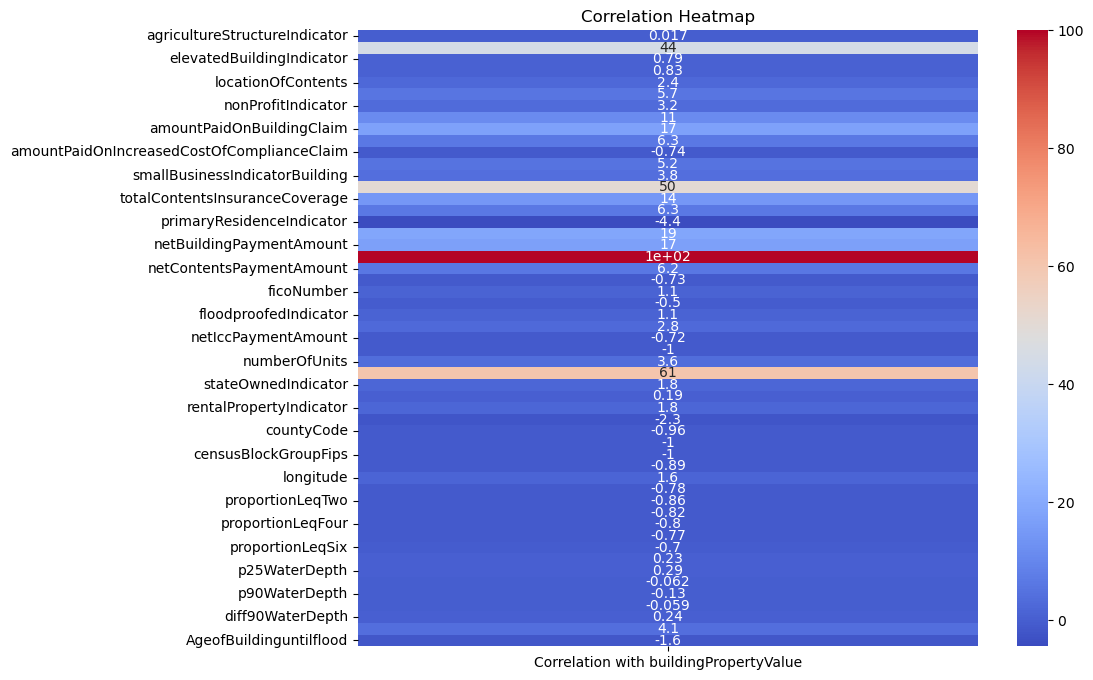

In [67]:
correlation_series = df.corrwith(df['buildingPropertyValue'])*100
correlation_df = correlation_series.to_frame(name='Correlation with buildingPropertyValue')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [68]:
correlation_df

,Correlation with buildingPropertyValue
agricultureStructureIndicator,0.016998
policyCount,44.204414
elevatedBuildingIndicator,0.793244
houseWorship,0.829343
locationOfContents,2.448984
numberOfFloorsInTheInsuredBuilding,5.746484
nonProfitIndicator,3.194316
occupancyType,11.432712
amountPaidOnBuildingClaim,17.453625
amountPaidOnContentsClaim,6.343531


In [74]:
df.head()

,agricultureStructureIndicator,asOfDate,policyCount,dateOfLoss,elevatedBuildingIndicator,ratedFloodZone,houseWorship,locationOfContents,numberOfFloorsInTheInsuredBuilding,nonProfitIndicator,occupancyType,originalConstructionDate,originalNBDate,amountPaidOnBuildingClaim,amountPaidOnContentsClaim,amountPaidOnIncreasedCostOfComplianceClaim,postFIRMConstructionIndicator,rateMethod,smallBusinessIndicatorBuilding,totalBuildingInsuranceCoverage,totalContentsInsuranceCoverage,yearOfLoss,primaryResidenceIndicator,buildingDamageAmount,buildingDeductibleCode,netBuildingPaymentAmount,buildingPropertyValue,causeOfDamage,condominiumCoverageTypeCode,contentsDeductibleCode,netContentsPaymentAmount,disasterAssistanceCoverageRequired,ficoNumber,floodWaterDuration,floodproofedIndicator,floodEvent,iccCoverage,netIccPaymentAmount,nfipRatedCommunityNumber,nfipCommunityName,numberOfUnits,buildingReplacementCost,replacementCostBasis,stateOwnedIndicator,waterDepth,rentalPropertyIndicator,state,reportedCity,reportedZipCode,countyCode,censusTract,censusBlockGroupFips,latitude,longitude,id,proportionLeqOne,proportionLeqTwo,proportionLeqThree,proportionLeqFour,proportionLeqFive,proportionLeqSix,medWaterDepth,p25WaterDepth,p75WaterDepth,p90WaterDepth,diffMedWaterDepth,diff90WaterDepth,originalConstructionDate_year,AgeofBuildinguntilflood
0,0,2020-01-22T16:55:53.194Z,1,1998-02-07 00:00:00+00:00,0,X,0,NaN,4.0,0,1.0,1963-01-01 00:00:00+00:00,1997-01-11T00:00:00.000Z,NaN,NaN,NaN,0,7,0,200000.0,50000.0,1998,0,382.0,0,0.00,937.0,1,N,0,0.0,0.0,612.0,0.0,0,Pineapple Express - Southern,15000.0,0.0,60294.0,"OCEANSIDE, CITY OF",1.0,937.0,A,0,0.0,0,CA,Currently Unavailable,92056.0,6073.0,6.073019e+09,6.073019e+10,33.2,-117.3,23dcb0d8-3e61-45bf-899f-b951946ce2ff,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,1963.0,35.0
1,0,2020-01-22T16:55:53.194Z,1,2005-08-29 00:00:00+00:00,0,X,0,NaN,2.0,0,1.0,1967-07-01 00:00:00+00:00,1990-07-12T00:00:00.000Z,NaN,NaN,NaN,0,7,0,100000.0,40000.0,2005,1,NaN,0,0.00,NaN,1,N,0,0.0,0.0,654.0,0.0,0,Hurricane Katrina,30000.0,0.0,225203.0,NEW ORLEANS/ORLEANS PARISH*,1.0,NaN,A,0,0.0,0,LA,Currently Unavailable,70131.0,22071.0,2.207100e+10,2.207100e+11,29.9,-90.0,55783cdd-ccbd-4b19-930b-072def248507,0.928571,0.939560,0.939560,0.939560,0.950549,0.950549,0.0,0.0,1.0,1.0,0.0,-1.0,1967.0,38.0
2,0,2020-01-22T16:55:53.194Z,1,1998-09-28 00:00:00+00:00,0,X,0,NaN,1.0,0,1.0,1972-01-01 00:00:00+00:00,1997-07-24T00:00:00.000Z,8813.21,1720.0,0.0,0,1,0,100000.0,50000.0,1998,1,9313.0,0,8813.21,80000.0,1,N,0,1720.0,0.0,133.0,0.0,0,Hurricane Georges (Panhandle),15000.0,0.0,120274.0,SANTA ROSA COUNTY *,1.0,100000.0,A,0,0.0,0,FL,Currently Unavailable,32566.0,12113.0,1.211301e+10,1.211301e+11,30.4,-86.9,bfb5922b-1b21-4882-b1d4-b3825ff53e37,0.888889,0.888889,0.888889,0.888889,1.000000,1.000000,0.0,0.0,0.0,1.0,0.0,-1.0,1972.0,26.0
3,0,2019-09-19T13:45:58.425Z,1,1994-10-07 00:00:00+00:00,0,X,0,NaN,2.0,0,1.0,1960-01-01 00:00:00+00:00,1993-10-01T00:00:00.000Z,2906.00,0.0,0.0,0,7,0,100000.0,25000.0,1994,0,4428.0,0,2906.00,100000.0,1,N,0,0.0,0.0,NaN,0.0,0,None,NaN,0.0,450026.0,"BEAUFORT, CITY OF",1.0,0.0,A,0,0.0,0,SC,Currently Unavailable,29902.0,45013.0,4.501300e+10,4.501300e+11,32.4,-80.7,c1cf6e00-1e6d-4493-93fc-eb430ef15495,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,1960.0,34.0
4,0,2019-09-19T13:45:58.425Z,1,1996-03-11 00:00:00+00:00,0,X,0,NaN,1.0,0,1.0,1988-01-01 00:00:00+00:00,1996-01-11T00:00:00.000Z,3875.53,1545.0,0.0,1,7,0,100000.0,25000.0,1996,1,5252.0,0,3875.53,100000.0,1,N,0,1545.0,0.0,NaN,0.0,0,None,NaN,0.0,125092.0,BREVARD COUNTY *,1.0,0.0,A,0,0.0,0,FL,Currently Unavailable,32940.0,12009.0,1.200906e+10,1.200906e+11,28.3,-80.7,cad8334c-13f2-4837-bdcf-e09591197ff7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,1988.0,8.0


In [81]:
df[df['amountPaidOnBuildingClaim']<0]['amountPaidOnBuildingClaim'].unique()

array([0.])

In [ ]:
df['amountPaidOnBuildingClaim'].unique()

In [39]:
# drop_columns = ['floodCharacteristicsIndicator', 'eventDesignationNumber', 'lowestAdjacentGrade',
#                 'nonPaymentReasonBuilding', 'elevationCertificateIndicator', 'lowestFloorElevation',
#                 'baseFloodElevation', 'floodZoneCurrent', 'nfipCommunityNumberCurrent', 'elevationDifference',
#                 'basementEnclosureCrawlspaceType', 'nonPaymentReasonContents', 'buildingDescriptionCode',
#                 'contentsReplacementCost', 'contentsPropertyValue', 'contentsDamageAmount',
#                 'crsClassificationCode', 'obstructionType']

# data2 = df.drop(columns=drop_columns)

# data2 = data2[(data2['amountPaidOnBuildingClaim'] >= 0) | data2['amountPaidOnBuildingClaim'].isna()]
# data2 = data2[(data2['amountPaidOnContentsClaim'] >= 0) | data2['amountPaidOnContentsClaim'].isna()]
# data2 = data2[(data2['amountPaidOnIncreasedCostOfComplianceClaim'] >= 0) | data2['amountPaidOnIncreasedCostOfComplianceClaim'].isna()]
# data2 = data2[(data2['buildingDamageAmount'] <= 100000000) | data2['buildingDamageAmount'].isna()]
# data2 = data2[(data2['buildingPropertyValue'] <= 100000000) | data2['buildingPropertyValue'].isna()]
# data2 = data2[(data2['buildingReplacementCost'] <= 100000000) | data2['buildingReplacementCost'].isna()]
# data2 = data2[(data2['floodWaterDuration'] <= 999) | data2['floodWaterDuration'].isna()]
# data2 = data2[(data2['netBuildingPaymentAmount'] >= 0) | data2['netBuildingPaymentAmount'].isna()]
# data2 = data2[(data2['totalBuildingInsuranceCoverage'] <= 100000000) | data2['totalBuildingInsuranceCoverage'].isna()]
# data2 = data2[((data2['waterDepth'] <= 30) & (data2['waterDepth'] >= -30)) | data2['waterDepth'].isna()]

In [49]:
df['dateOfLoss'] = pd.to_datetime(df['dateOfLoss'])
df['originalConstructionDate'] = pd.to_datetime(df['originalConstructionDate'], errors='coerce')
df['originalConstructionDate_year'] = df['originalConstructionDate'].dt.year

df['AgeofBuildinguntilflood'] = df['yearOfLoss'] - df['originalConstructionDate_year']

In [53]:
df[df['AgeofBuildinguntilflood'] < 0]['AgeofBuildinguntilflood'].sum()

-36594.0